In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle
import sys
current_dir = %pwd

# Sarsa Replay using RAM Features
We try different parameters N (replay times).

In [4]:
results_dir = current_dir + '/../results'
replay_times = [1]
Ns = len(replay_times)
# 3 trials of 3000 episodes
numtrials = 3
numep = 3000

steps = np.zeros((Ns, numtrials, numep))
rewards = np.zeros((Ns, numtrials, numep))

for replay_idx, replay in enumerate(replay_times):
    for trial in range(numtrials):
        with open(results_dir + '/replay_{}/results/replaySARSA_RAM_{}.log'.format(
                                replay, trial+1)) as f:
            log = pickle.load(f)
            steps[replay_idx,trial,:] = np.array(log['steps'])
            rewards[replay_idx,trial,:] = np.array(log['reward'])

Calculate basic statistics of number of steps over different trials

In [13]:
from scipy import stats
mean_steps = np.mean(steps,axis=1) #average steps
print mean_steps.shape
err = stats.sem(steps,axis=1) #standard error of mean
print "An average of %s steps" % str(np.mean(mean_steps))

#statistics for first 500 episodes
mean_500 = np.mean(steps[:500:],axis=1)
err_500 = stats.sem(steps[:500:],axis=1) #standard error of mean 

(1, 3000)
An average of 67.6563333333 steps



Plot learning curves with 95% confidence (t_dist standard error Note: this assumes normal distribution of means, probably not true here)

3000


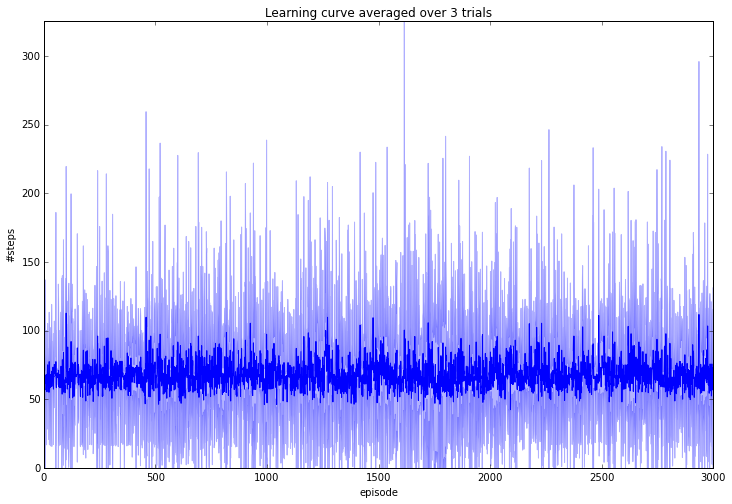

In [19]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., numtrials-1)

for N_idx, N in enumerate(replay_times):
    plt.plot(mean_steps[N_idx])
    print mean_steps.size
    plt.fill_between(np.arange(numep),(mean_steps[N_idx]-t*err[N_idx]),(mean_steps[N_idx]+t*err[N_idx]),alpha=0.3,color=color)

    plt.xlabel('episode')
    plt.ylabel('#steps')
    plt.ylim((0,np.max(mean_steps+t*err)))
    plt.title('Learning curve averaged over {} trials'.format(numtrials))

In [26]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

#standard running average
def running_average(x,window,axis=0):
    return filters.convolve1d(x,np.ones(window),axis)

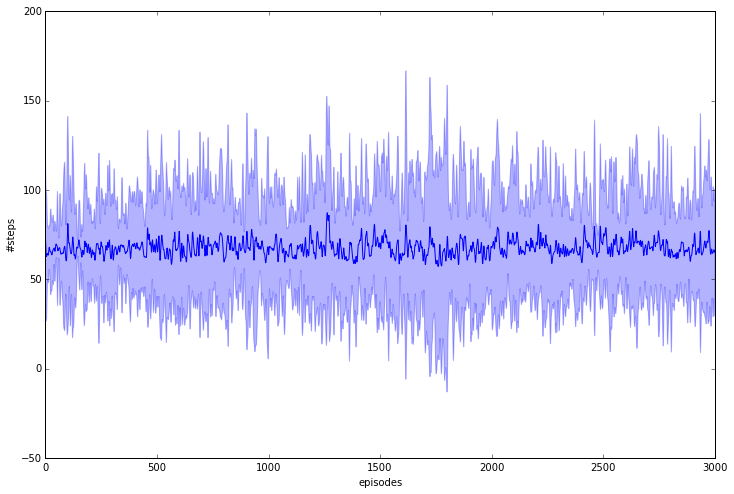

In [27]:
mean_sm = smoothing(mean_steps[0], 100, 0)
err_sm = smoothing(err[0], 100, 0)

plt.figure(figsize=(12,8))
plt.plot(mean_sm)
plt.fill_between(np.arange(numep),(mean_sm-t*err_sm),(mean_sm+t*err_sm),alpha=0.3,color=color)

plt.ylabel('#steps')
plt.xlabel('episodes')


## Reward Analysis

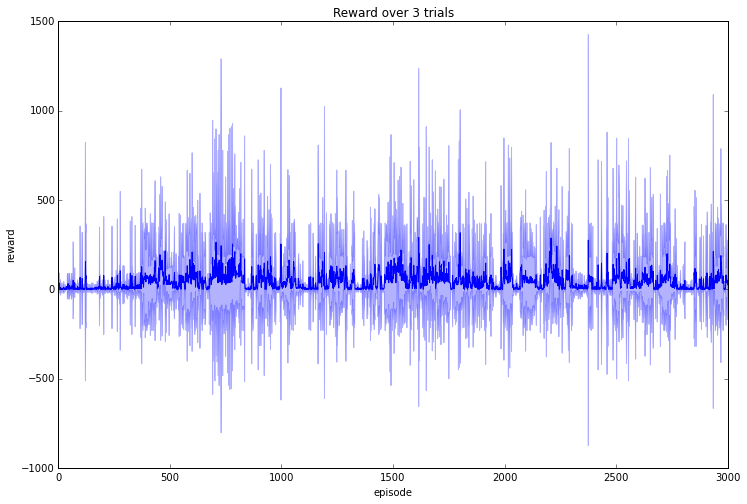

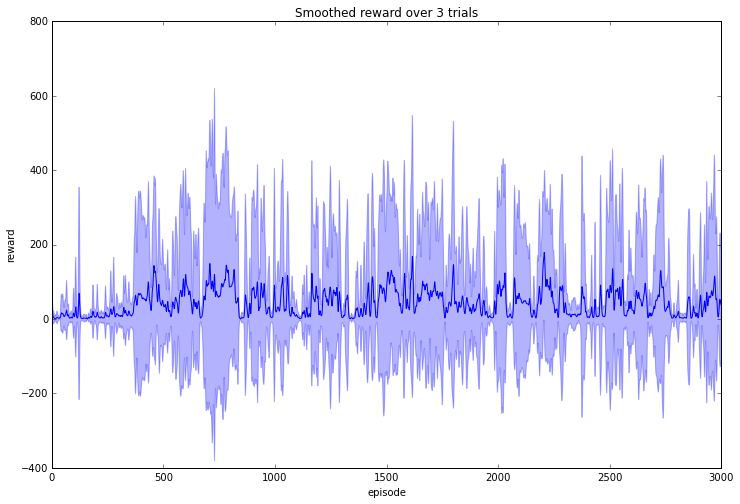

In [30]:
mean_rew = np.mean(rewards,axis=1)[0] #average reward
err_rew = stats.sem(rewards,axis=1)[0] #standard error of mean

mean_rew_sm = smoothing(mean_rew, 100, 0)
err_rew_sm = smoothing(err_rew, 100, 0)

plt.figure(figsize=(12,8))

plt.plot(mean_rew)
plt.fill_between(np.arange(numep),(mean_rew-t*err_rew),(mean_rew+t*err_rew),alpha=0.3,color='blue')

plt.ylabel('reward')
plt.xlabel('episode')
plt.title('Reward over {} trials'.format(numtrials))

plt.figure(figsize=(12,8))

plt.plot(mean_rew_sm)
plt.fill_between(np.arange(numep),(mean_rew_sm-t*err_rew_sm),(mean_rew_sm+t*err_rew_sm),alpha=0.3,color='blue')

plt.ylabel('reward')
plt.xlabel('episode')
plt.title('Smoothed reward over {} trials'.format(numtrials))